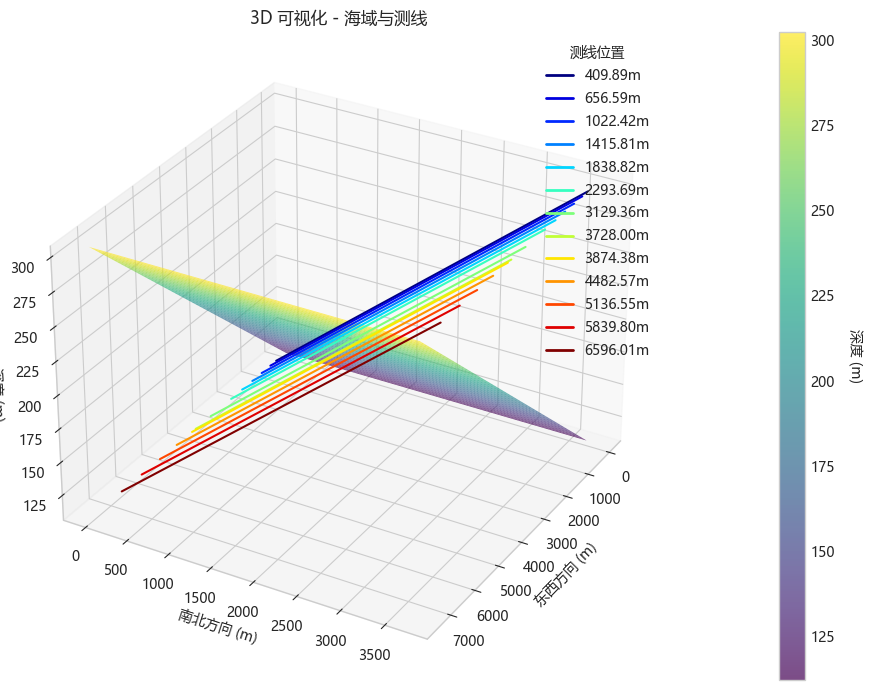

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体，替换为您系统中的中文字体
# Parameters
alpha = 1.5  # Slope angle in degrees
D_center = 110  # Depth at the center in meters
width_east_west = 7408  # Width of the area in meters
length_north_south = 3704  # Length of the area in meters
best_lines_positions = [409.89, 656.59, 1022.42, 1415.81, 1838.82, 2293.69, 3129.36, 3728.00, 3874.38, 4482.57, 5136.55, 5839.80, 6596.01]

# Generate depth data for the entire sea area
X = np.linspace(0, width_east_west, 300)
Y = np.linspace(0, length_north_south, 150)
X, Y = np.meshgrid(X, Y)
Z = D_center + X * np.tan(np.radians(alpha))

# Create distinct colors for each survey line
colors = plt.cm.jet(np.linspace(0, 1, len(best_lines_positions)))

# 3D Visualization with distinct colors for survey lines
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

# Add colorbar to show depth
cb = fig.colorbar(surf, ax=ax, pad=0.1, aspect=25)
cb.set_label('深度 (m)', rotation=270, labelpad=20)

# Plot the survey lines on the 3D plot with distinct colors
for idx, position in enumerate(best_lines_positions):
    ax.plot([position, position], [0, length_north_south], [Z.min(), Z.max()], color=colors[idx])

# Create a legend for the survey lines
legend_elements = [plt.Line2D([0], [0], color=colors[idx], lw=2, label=f"{position:.2f}m") for idx, position in enumerate(best_lines_positions)]
ax.legend(handles=legend_elements, title="测线位置", loc="upper right")

ax.set_title('3D 可视化 - 海域与测线')
ax.set_xlabel('东西方向 (m)')
ax.set_ylabel('南北方向 (m)')
ax.set_zlabel('深度 (m)')
ax.view_init(30, 30)  # Set the view angle
plt.tight_layout()
plt.show()



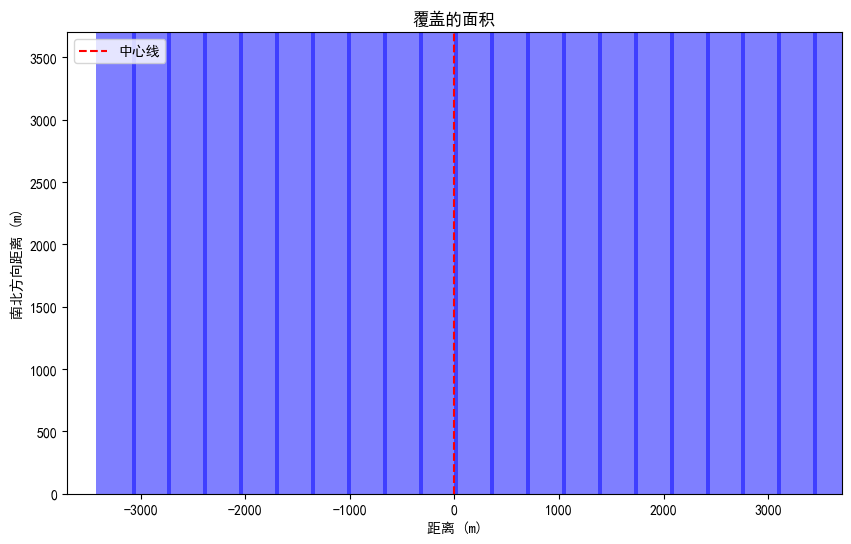

,测线起始位置 (m),测线结束位置 (m),测距 (m),覆盖面积 (m^2),测线数量
0,-3429.460599,-3048.409421,381.051178,1.411414e+06,21
1,-3086.514539,-2705.463361,381.051178,1.411414e+06,21
2,-2743.568479,-2362.517302,381.051178,1.411414e+06,21
3,-2400.622419,-2019.571242,381.051178,1.411414e+06,21
4,-2057.676359,-1676.625182,381.051178,1.411414e+06,21
5,-1714.730299,-1333.679122,381.051178,1.411414e+06,21
6,-1371.784240,-990.733062,381.051178,1.411414e+06,21
7,-1028.838180,-647.787002,381.051178,1.411414e+06,21
8,-685.892120,-304.840942,381.051178,1.411414e+06,21
9,-342.946060,38.105118,381.051178,1.411414e+06,21


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Given parameters
theta = 120  # in degrees
alpha = 1.5  # in degrees
D_center = 110  # in meters
width_rect = 4 * 1852  # 4 nautical miles to meters
overlap_rate = 0.10

# Function to calculate D' based on beta and X
def calculate_D_prime(beta, X, alpha):
    alpha_prime = np.arctan(np.tan(np.radians(alpha)) * np.cos(np.radians(beta)))
    if 0 <= beta < 90 or 270 <= beta < 360:
        return D_center + X * np.tan(alpha_prime)
    else:
        return D_center - X * np.tan(alpha_prime)

# Function to calculate W' based on D' and alpha'
def calculate_W_prime(D_prime, alpha, theta):
    alpha_prime = np.arctan(np.tan(np.radians(alpha)) * np.cos(np.radians(beta_center)))
    return 2 * (D_prime / np.cos(alpha_prime)) * np.tan(np.radians(theta / 2))

# Function to calculate the movement distance based on W' and overlap rate
def calculate_movement_distance(W_prime, overlap_rate):
    return W_prime * (1 - overlap_rate)

# Calculate W' at the center point
beta_center = 90  # as the ship moves perpendicular to the slope
D_prime_center = D_center  # as the depth doesn't change for beta = 90
W_prime_center = calculate_W_prime(D_prime_center, alpha, theta)

# Calculate movement distance
movement_distance = calculate_movement_distance(W_prime_center, overlap_rate)

# Calculate the number of lines needed on one side of the center
num_lines_one_side = int(np.ceil((width_rect / 2) / movement_distance))

# Total number of lines needed
total_lines = 2 * num_lines_one_side - 1  # minus 1 as the center line is counted twice

# Calculate the starting position for the first line (from the center point)
start_position = -movement_distance * (num_lines_one_side - 1)

# List to store the covered areas
covered_areas = []

# Calculate the covered area for each line
for i in range(total_lines):
    x_start = start_position + i * movement_distance
    x_end = x_start + W_prime_center
    covered_areas.append((x_start, x_end))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-width_rect / 2, width_rect / 2)
ax.set_ylim(0, 2 * 1852)  # height of the rectangle is 2 nautical miles
ax.set_title("覆盖的面积")
ax.set_xlabel("距离 (m)")
ax.set_ylabel("南北方向距离 (m)")
ax.axvline(0, color='r', linestyle='--', label="中心线")  # center line

# Plot the covered areas
for area in covered_areas:
    rect = patches.Rectangle((area[0], 0), area[1] - area[0], 2 * 1852, facecolor='blue', alpha=0.5)
    ax.add_patch(rect)

ax.legend()
plt.show()

# Create a table with the results
df_results = pd.DataFrame({
    "测线起始位置 (m)": [area[0] for area in covered_areas],
    "测线结束位置 (m)": [area[1] for area in covered_areas],
    "测距 (m)": [W_prime_center for _ in covered_areas],
    "覆盖面积 (m^2)": [(area[1] - area[0]) * 2 * 1852 for area in covered_areas]
})
df_results["测线数量"] = total_lines

# Create a table with the results
df_results = pd.DataFrame({
    "测线起始位置 (m)": [area[0] for area in covered_areas],
    "测线结束位置 (m)": [area[1] for area in covered_areas],
    "测距 (m)": [W_prime_center for _ in covered_areas],
    "覆盖面积 (m^2)": [(area[1] - area[0]) * 2 * 1852 for area in covered_areas]
})
df_results["测线数量"] = total_lines

df_results

